\begin{equation}
     P_{0} = \left[ \sum_{k=0}^{c} \frac{\lambda^{k}}{\mu^{k}k!} + \frac{\lambda^{c}}{\mu^{c} c!} \sum_{k = c+1}^{K} \frac{\lambda^{k-c}}{\mu^{k-c}c^{k-c}} \right]^{-1}
\end{equation}

\begin{equation}
  \rho = \frac{\lambda}{c\mu}
\end{equation}

\begin{equation}
W_{q} = P_{0} \frac{\rho{(c \rho)}^{c}}{\lambda{(1-\rho)}^{2}c!}
\end{equation}

\begin{equation}
  \mathbb{M} \Theta = \lambda W = \frac{\lambda}{\mu} + P_{0} \frac{\rho(c \rho)^{c}}{(1-\rho)^{2}c!}
\end{equation}

In [16]:
import math

def P_0(lambda_, mu, K, c):
    return (sum([lambda_**k / (mu**k * math.factorial(k))
                 for k in range(0, c + 1)])
            + lambda_**c / (mu**c * math.factorial(c)) 
            * sum([lambda_**(k - c) / (mu**(k-c) * c**(k-c))
                   for k in range(c + 1, K + 1)]))**(-1)

def Ro(lambda_, c, mu):
    return lambda_ / (c * mu)

def W_q(lambda_, mu, K, c):
    ro = Ro(lambda_, c, mu)
    print(ro)
    
    p = P_0(lambda_, mu, K, c)
    print(f"{p=}")
    
    return (ro * (ro * c)**c)/(lambda_ * (1-ro)**2 * math.factorial(c))

def Theta(lambda_, mu, K, c):
    ro = Ro(lambda_, c, mu)
    
    return lambda_/mu + P_0(lambda_, mu, K, c) * (ro * (ro * c)**c)/((1-ro)**2 * math.factorial(c))

m = 8
n = 3
l = 1/60
mu = 1/50

w_q = (W_q(l, mu, m, n))
print(w_q)
theta = Theta(l, mu, m, n)
print(theta)

0.2777777777777778
p=0.4321444208452375
3.0818540433925055
0.8555301005118567


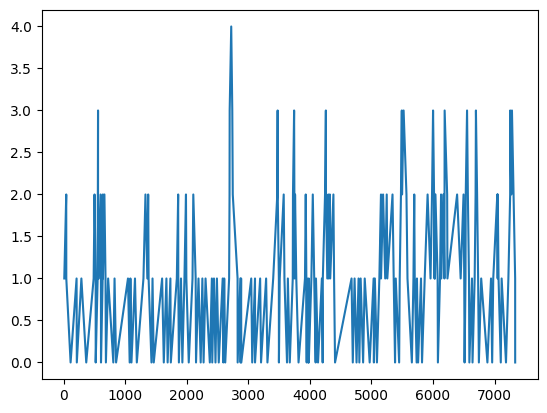

In [7]:
from matplotlib import pyplot as plt
import csv


data = []

with open('../100.000.000-exp.csv', 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        data.append(row)
        
# remove header
data = data[1:]

    
seconds = [float(row[0]) for row in data]
requests_in_system = [int(row[1]) for row in data]
queue_length_mean = [float(row[3]) for row in data]
waiting_mean = [float(row[2]) for row in data]


plt.plot(seconds[:250], requests_in_system[:250])
plt.savefig('10_000_seconds-requests_in_system.png')

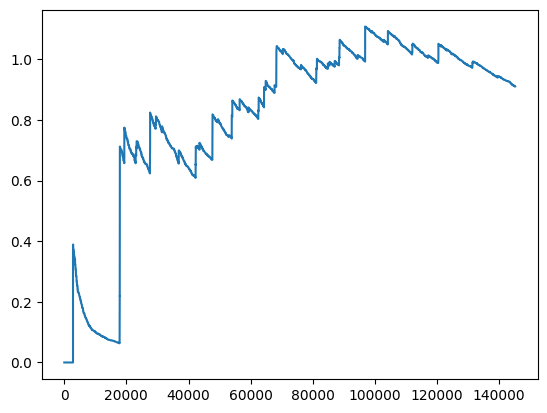

In [8]:
plt.plot(seconds[:5000], waiting_mean[:5000])
plt.savefig('10_000_seconds-waiting_mean.png')

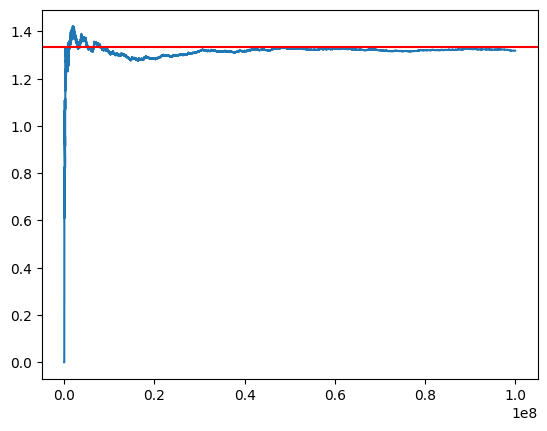

In [9]:
plt.plot(seconds, waiting_mean)
plt.axhline(y=w_q, color='r', linestyle='-')
plt.savefig('1_000_000_seconds-waiting_mean.png')

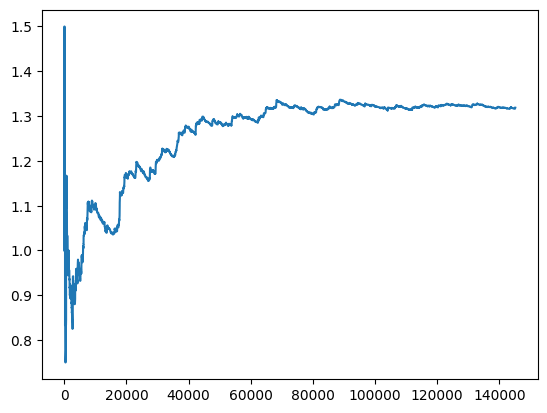

In [10]:
plt.plot(seconds[:5000], queue_length_mean[:5000])
plt.savefig('10_000_seconds-queue_length_mean.png')

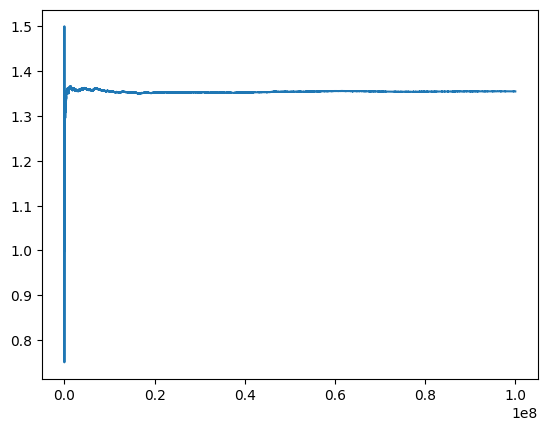

In [11]:
plt.plot(seconds, queue_length_mean)
plt.savefig('1_000_000_seconds-queue_length_mean.png')

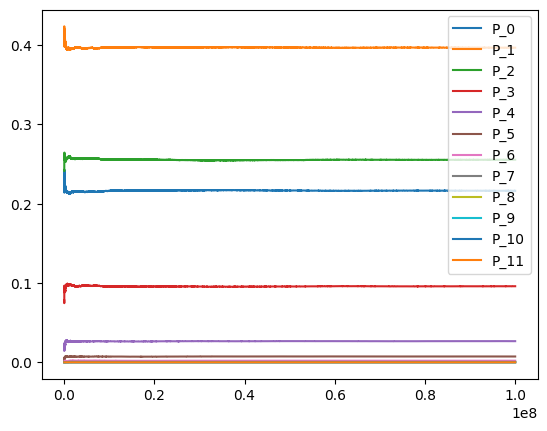

In [13]:
ns = [0 for k in range(0, m + n + 1)]
p_ns = [[] for k in range(0, m + n + 1)]

for num in requests_in_system:
    ns[num] += 1
    
    s = sum(ns)
    p_n = [p / s for p in ns]
    
#     assert sum(p_n) == 1
    
    for i, p in enumerate(p_n):
        p_ns[i].append(p)
    
for i, p_n in enumerate(p_ns):
    plt.plot(seconds[1000:], p_n[1000:], label=f"P_{i}")
    
plt.legend(loc="upper right")
plt.savefig('1_000_000_seconds-p_n.png')

In [20]:
print(p_ns[4][-1])

0.026637390679731334
